# Agent Langgraph
## Bez narzędzi

## Importowanie bibliotek

In [3]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, START, StateGraph, MessagesState
import logging
from IPython.display import Image, Markdown, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

## Konfiguracja logowania

In [2]:
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
    logging.basicConfig(
        filename="langgraph_notebook.log",
        level=logging.INFO
    )

## Konfiguracja agenta i modelu

In [4]:
model = ChatOpenAI(model="gpt-4.1-nano", temperature =0)
def call_model(state: MessagesState):
    messages = state["messages"]
    response = model.invoke(messages)
    return {"messages": [response]}

workflow = StateGraph(MessagesState)
workflow.add_node("agent", call_model)
workflow.add_edge(START, "agent")
checkpointer = MemorySaver()
app = workflow.compile(checkpointer=checkpointer)

## Wizualizacja grafu

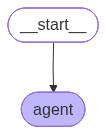

In [6]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Czat z agentem

In [8]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="W jakich zespołach grał Joe Montana?")]},
    config={"configurable": {"thread_id":99}}
)
display(Markdown(final_state["messages"][-1].content))

Joe Montana grał w następujących zespołach NFL:

1. San Francisco 49ers (1979–1992) – to właśnie z tym zespołem zdobył największą sławę, wygrywając cztery Super Bowle i będąc wielokrotnie wybieranym do Pro Bowl.
2. Kansas City Chiefs (1993–1994) – po odejściu z 49ers, grał jeszcze przez dwa sezony w Chiefs, kończąc swoją karierę NFL.

Czy chcesz więcej informacji na temat jego kariery lub osiągnięć?

In [9]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="Jakie ligi są dostępne na platformie futbolu fantasy SportsWorldCentral??")]},
    config={"configurable": {"thread_id":99}}
)
display(Markdown(final_state["messages"][-1].content))

Na platformie futbolu fantasy SportsWorldCentral dostępne są następujące ligi:

1. Liga NFL (National Football League) – główna liga fantasy oparta na amerykańskiej lidze NFL, obejmująca sezon regularny i playoffy.
2. Liga college football (Futbol uniwersytecki) – liga fantasy skupiająca się na rozgrywkach NCAA, umożliwiająca rywalizację wśród drużyn uniwersyteckich.
3. Liga futbolu międzynarodowego (np. Liga europejska, Liga światowa) – w niektórych sezonach dostępne są również ligi oparte na międzynarodowych rozgrywkach futbolu amerykańskiego lub innych formatach.

Dodatkowo, platforma może oferować specjalne ligi sezonowe, turnieje lub ligi prywatne, które można tworzyć i zapraszać znajomych.

Czy chcesz szczegółowe informacje o konkretnej lidze lub o tym, jak dołączyć?